# **Preprocessing**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy import stats

In [ ]:
from google.colab import files
import io
import pandas as pd


uploaded = files.upload()
for file_name in uploaded.keys():
    raw_data = pd.read_csv(io.BytesIO(uploaded[file_name]), delimiter=';')

    print(f"Data from file: {file_name}")
    print(raw_data.head())


Saving Raw Data.csv to Raw Data.csv
Data from file: Raw Data.csv
   dob  sex  county  alcohol  drug  cigarette  Diagnoses  cancerstage  \
0   47    0      22        3     3          3          1            6   
1   41    1      19        2     2          2          1            5   
2   44    1      22        3     3          3          2            3   
3   54    1      47        2     3          2          3            6   
4   44    1      16        2     3          2          3            4   

   hivstatus  child  ...  bleeding  dizziness  hearing  vomiting  numbness  \
0          2      0  ...         0          0        0         0         0   
1          2      0  ...         0          0        0         0         0   
2          2      0  ...         0          0        0         0         0   
3          2      0  ...         0          0        0         0         0   
4          1      0  ...         0          0        0         0         0   

   bweakness  dhydration  a

In [ ]:
data = pd.read_csv('/content/Raw Data.csv', delimiter=';')

In [ ]:
data.head()

,dob,sex,county,alcohol,drug,cigarette,Diagnoses,cancerstage,hivstatus,child,...,bleeding,dizziness,hearing,vomiting,numbness,bweakness,dhydration,appetite,wloss,cough
0,47,0,22,3,3,3,1,6,2,0,...,0,0,0,0,0,0,0,0,0,0
1,41,1,19,2,2,2,1,5,2,0,...,0,0,0,0,0,0,0,0,0,0
2,44,1,22,3,3,3,2,3,2,0,...,0,0,0,0,0,0,0,0,0,0
3,54,1,47,2,3,2,3,6,2,0,...,0,0,0,0,0,0,0,0,0,0
4,44,1,16,2,3,2,3,4,1,0,...,0,0,0,0,0,0,0,0,0,0


**Encoding Features**

1. County

In [ ]:
sorted(data['county'].unique())

[1,
 2,
 3,
 5,
 6,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 25,
 26,
 27,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48]

In [ ]:
county = pd.get_dummies(data['county'])
county.head()

,1,2,3,5,6,9,10,11,12,13,...,39,40,41,42,43,44,45,46,47,48
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
county['check'] = county.sum(axis=1)
print(county['check'].sum(axis=0))
print(county['check'].unique())
county.drop(['check'], axis=1, inplace=True)

1973
[1]


In [ ]:
data.drop(['county'], axis=1, inplace=True)

In [ ]:
county['Coast Province'] = county.loc[:, 1:6].any(axis=1)
county['Northern Kenya'] = county.loc[:, 9:10].any(axis=1)
county['Eastern Province'] = county.loc[:, 11:17].any(axis=1)
county['Central Province'] = county.loc[:, 18:22].any(axis=1)
county['Rift Valley Province'] = county.loc[:, 25:36].any(axis=1)
county['Western Province'] = county.loc[:, 37:40].any(axis=1)
county['Nyanza Kenya'] = county.loc[:, 41:46].any(axis=1)
county['Nairobi Province'] = county.loc[:, 47:].any(axis=1)

In [ ]:
data = pd.concat([data, county['Coast Province'], county['Northern Kenya'], county['Eastern Province'], county['Central Province'], county['Rift Valley Province'], county['Western Province'], county['Nyanza Kenya'], county['Nairobi Province']], axis=1)
data['Nairobi & Central Province'] = data[['Nairobi Province', 'Central Province']].any(axis=1)
data.drop(['Nairobi Province', 'Central Province'], axis=1, inplace=True)
data.head()

,dob,sex,alcohol,drug,cigarette,Diagnoses,cancerstage,hivstatus,child,housing,...,appetite,wloss,cough,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province
0,47,0,3,3,3,1,6,2,0,0,...,0,0,0,False,False,False,False,False,False,True
1,41,1,2,2,2,1,5,2,0,0,...,0,0,0,False,False,False,False,False,False,True
2,44,1,3,3,3,2,3,2,0,0,...,0,0,0,False,False,False,False,False,False,True
3,54,1,2,3,2,3,6,2,0,0,...,0,0,0,False,False,False,False,False,False,True
4,44,1,2,3,2,3,4,1,0,1,...,0,0,0,False,False,True,False,False,False,True


In [ ]:
data.columns.values

array(['dob', 'sex', 'alcohol', 'drug', 'cigarette', 'Diagnoses',
       'cancerstage', 'hivstatus', 'child', 'housing', 'insurance',
       'transport', 'work', 'treatment', 'dealingwithchildren',
       'dealingwithpartner', 'abilitytohavechild', 'familyhealthissues',
       'depression', 'fear', 'nervous', 'sadness', 'worry',
       'lossofinterest', 'spiritual', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province']

In [ ]:
column_names_reordered = ['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'alcohol', 'drug', 'cigarette', 'Diagnoses',
       'cancerstage', 'hivstatus', 'child', 'housing', 'insurance',
       'transport', 'work', 'treatment', 'dealingwithchildren',
       'dealingwithpartner', 'abilitytohavechild', 'familyhealthissues',
       'depression', 'fear', 'nervous', 'sadness', 'worry',
       'lossofinterest', 'spiritual', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough']

In [ ]:
data = data[column_names_reordered]
data.head()

,dob,sex,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province,alcohol,...,bleeding,dizziness,hearing,vomiting,numbness,bweakness,dhydration,appetite,wloss,cough
0,47,0,False,False,False,False,False,False,True,3,...,0,0,0,0,0,0,0,0,0,0
1,41,1,False,False,False,False,False,False,True,2,...,0,0,0,0,0,0,0,0,0,0
2,44,1,False,False,False,False,False,False,True,3,...,0,0,0,0,0,0,0,0,0,0
3,54,1,False,False,False,False,False,False,True,2,...,0,0,0,0,0,0,0,0,0,0
4,44,1,False,False,True,False,False,False,True,2,...,0,0,0,0,0,0,0,0,0,0


2. Alcohol, Drugs $ Cigarette

In [ ]:
alcohol = pd.get_dummies(data['alcohol'])
drug = pd.get_dummies(data['drug'])
cigarette = pd.get_dummies(data['cigarette'])
print(alcohol.head())
print(drug.head())
print(cigarette.head())

       0      1      2      3      4
0  False  False  False   True  False
1  False  False   True  False  False
2  False  False  False   True  False
3  False  False   True  False  False
4  False  False   True  False  False
       0      1      2      3      4
0  False  False  False   True  False
1  False  False   True  False  False
2  False  False  False   True  False
3  False  False  False   True  False
4  False  False  False   True  False
       0      1      2      3      4
0  False  False  False   True  False
1  False  False   True  False  False
2  False  False  False   True  False
3  False  False   True  False  False
4  False  False   True  False  False


In [ ]:
alcohol['check'] = alcohol.sum(axis=1)
print(alcohol['check'].sum(axis=0))
print(alcohol['check'].unique())
alcohol.drop(['check'], axis=1, inplace=True)
alcohol.drop([4], axis=1, inplace=True)

drug['check'] = drug.sum(axis=1)
print(drug['check'].sum(axis=0))
print(drug['check'].unique())
drug.drop(['check'], axis=1, inplace=True)
drug.drop([4], axis=1, inplace=True)

cigarette['check'] = cigarette.sum(axis=1)
print(cigarette['check'].sum(axis=0))
print(cigarette['check'].unique())
cigarette.drop([4], axis=1, inplace=True)

1973
[1]
1973
[1]
1973
[1]


In [ ]:
data.drop(['alcohol'], axis=1, inplace=True)
data.drop(['drug'], axis=1, inplace=True)
data.drop(['cigarette'], axis=1, inplace=True)

In [ ]:
alcohol['Alcohol_Use'] = alcohol.loc[:, 1:2].any(axis=1)
alcohol['Alcohol_NonUse'] = alcohol.loc[:, 3:].any(axis=1)

drug['Drug_Use'] = drug.loc[:, 1:2].any(axis=1)
drug['Drug_NonUse'] = drug.loc[:, 3:].any(axis=1)

cigarette['Cigarette_Use'] = cigarette.loc[:, 1:2].any(axis=1)
cigarette['Cigarette_NonUse'] = cigarette.loc[:, 3:].any(axis=1)

In [ ]:
data = pd.concat([data, alcohol['Alcohol_Use'], alcohol['Alcohol_NonUse'], drug['Drug_Use'], drug['Drug_NonUse'], cigarette['Cigarette_Use'], cigarette['Cigarette_NonUse']], axis=1)
data.head()

,dob,sex,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province,Diagnoses,...,dhydration,appetite,wloss,cough,Alcohol_Use,Alcohol_NonUse,Drug_Use,Drug_NonUse,Cigarette_Use,Cigarette_NonUse
0,47,0,False,False,False,False,False,False,True,1,...,0,0,0,0,False,True,False,True,False,True
1,41,1,False,False,False,False,False,False,True,1,...,0,0,0,0,True,True,True,True,True,True
2,44,1,False,False,False,False,False,False,True,2,...,0,0,0,0,False,True,False,True,False,True
3,54,1,False,False,False,False,False,False,True,3,...,0,0,0,0,True,True,False,True,True,True
4,44,1,False,False,True,False,False,False,True,3,...,0,0,0,0,True,True,False,True,True,True


In [ ]:
data['Alcohol, Drug & Cigarette Use'] = data[['Alcohol_Use', 'Drug_Use', 'Cigarette_Use']].any(axis=1)

In [ ]:
data = data.drop(columns=['Alcohol_Use', 'Drug_Use', 'Cigarette_Use', 'Alcohol_NonUse', 'Drug_NonUse', 'Cigarette_NonUse'])

In [ ]:
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province', 'Diagnoses',
       'cancerstage', 'hivstatus', 'child', 'housing', 'insurance',
       'transport', 'work', 'treatment', 'dealingwithchildren',
       'dealingwithpartner', 'abilitytohavechild', 'familyhealthissues',
       'depression', 'fear', 'nervous', 'sadness', 'worry',
       'lossofinterest', 'spiritual', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough', 'Alcohol, Drug & Cigarette Use'

In [ ]:
column_names_reordered = ['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province', 'Alcohol, Drug & Cigarette Use','Diagnoses',
       'cancerstage', 'hivstatus', 'child', 'housing', 'insurance',
       'transport', 'work', 'treatment', 'dealingwithchildren',
       'dealingwithpartner', 'abilitytohavechild', 'familyhealthissues',
       'depression', 'fear', 'nervous', 'sadness', 'worry',
       'lossofinterest', 'spiritual', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough']

In [ ]:
data = data[column_names_reordered]
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Diagnoses', 'cancerstage',
       'hivstatus', 'child', 'housing', 'insurance', 'transport', 'work',
       'treatment', 'dealingwithchildren', 'dealingwithpartner',
       'abilitytohavechild', 'familyhealthissues', 'depression', 'fear',
       'nervous', 'sadness', 'worry', 'lossofinterest', 'spiritual',
       'apperance', 'bathing', 'breathing', 'changesurination',
       'constipation', 'diarrhea', 'eating', 'fatigue', 'feelingswollen',
       'fever', 'gettingaround', 'indigestion', 'memory', 'sores',
       'nausea', 'nosedry', 'pain', 'sexual', 'skindry', 'sleep',
       'substance', 'tinglinghands', 'discharge', 'vision', 'speech',
       'bleeding', 'dizziness', 'hearing', 'vomiting', 'numbness',
       'bweakness', 'dhydration', 'appetite', 'wloss', 'cough'

In [ ]:
data.head()

,dob,sex,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province,"Alcohol, Drug & Cigarette Use",...,bleeding,dizziness,hearing,vomiting,numbness,bweakness,dhydration,appetite,wloss,cough
0,47,0,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
1,41,1,False,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
2,44,1,False,False,False,False,False,False,True,False,...,0,0,0,0,0,0,0,0,0,0
3,54,1,False,False,False,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0
4,44,1,False,False,True,False,False,False,True,True,...,0,0,0,0,0,0,0,0,0,0


3. Practical Problems

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data['Practical Problems'] = data[['child', 'housing', 'insurance', 'transport', 'work', 'treatment']].astype(str).agg(''.join, axis=1)

label_encoder = LabelEncoder()

data['Practical Problems'] = label_encoder.fit_transform(data['Practical Problems'])

data.drop(['child', 'housing', 'insurance', 'transport', 'work', 'treatment'], axis=1, inplace=True)
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Diagnoses', 'cancerstage',
       'hivstatus', 'dealingwithchildren', 'dealingwithpartner',
       'abilitytohavechild', 'familyhealthissues', 'depression', 'fear',
       'nervous', 'sadness', 'worry', 'lossofinterest', 'spiritual',
       'apperance', 'bathing', 'breathing', 'changesurination',
       'constipation', 'diarrhea', 'eating', 'fatigue', 'feelingswollen',
       'fever', 'gettingaround', 'indigestion', 'memory', 'sores',
       'nausea', 'nosedry', 'pain', 'sexual', 'skindry', 'sleep',
       'substance', 'tinglinghands', 'discharge', 'vision', 'speech',
       'bleeding', 'dizziness', 'hearing', 'vomiting', 'numbness',
       'bweakness', 'dhydration', 'appetite', 'wloss', 'cough',
       'Practical Problems'], dtype=object)

4. Family Problems

In [ ]:
data['Family Problems'] = data[['dealingwithchildren','dealingwithpartner', 'abilitytohavechild', 'familyhealthissues']].astype(str).agg(''.join, axis=1)

label_encoder = LabelEncoder()

data['Family Problems'] = label_encoder.fit_transform(data['Family Problems'])

data.drop(['dealingwithchildren','dealingwithpartner', 'abilitytohavechild', 'familyhealthissues'], axis=1, inplace=True)
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Diagnoses', 'cancerstage',
       'hivstatus', 'depression', 'fear', 'nervous', 'sadness', 'worry',
       'lossofinterest', 'spiritual', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough', 'Practical Problems',
       'Family Problems'], dtype=object)

5. Emotional Problems

In [ ]:
data['Emotional Problems'] = data[['depression', 'fear', 'nervous', 'sadness', 'worry', 'lossofinterest', 'spiritual']].astype(str).agg(''.join, axis=1)

label_encoder = LabelEncoder()

data['Emotional Problems'] = label_encoder.fit_transform(data['Emotional Problems'])

data.drop(['depression', 'fear', 'nervous', 'sadness', 'worry', 'lossofinterest', 'spiritual'], axis=1, inplace=True)
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Diagnoses', 'cancerstage',
       'hivstatus', 'apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough', 'Practical Problems',
       'Family Problems', 'Emotional Problems'], dtype=object)

6. Physical Problems

In [ ]:
data['Physical Problems'] = data[['apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough']].astype(str).agg(''.join, axis=1)

label_encoder = LabelEncoder()

data['Physical Problems'] = label_encoder.fit_transform(data['Physical Problems'])

data.drop(['apperance', 'bathing', 'breathing',
       'changesurination', 'constipation', 'diarrhea', 'eating',
       'fatigue', 'feelingswollen', 'fever', 'gettingaround',
       'indigestion', 'memory', 'sores', 'nausea', 'nosedry', 'pain',
       'sexual', 'skindry', 'sleep', 'substance', 'tinglinghands',
       'discharge', 'vision', 'speech', 'bleeding', 'dizziness',
       'hearing', 'vomiting', 'numbness', 'bweakness', 'dhydration',
       'appetite', 'wloss', 'cough'], axis=1, inplace=True)
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Diagnoses', 'cancerstage',
       'hivstatus', 'Practical Problems', 'Family Problems',
       'Emotional Problems', 'Physical Problems'], dtype=object)

In [ ]:
data.head()

,dob,sex,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province,"Alcohol, Drug & Cigarette Use",Diagnoses,cancerstage,hivstatus,Practical Problems,Family Problems,Emotional Problems,Physical Problems
0,47,0,False,False,False,False,False,False,True,False,1,6,2,0,0,15,48
1,41,1,False,False,False,False,False,False,True,True,1,5,2,0,0,3,133
2,44,1,False,False,False,False,False,False,True,False,2,3,2,0,0,13,27
3,54,1,False,False,False,False,False,False,True,True,3,6,2,0,0,0,27
4,44,1,False,False,True,False,False,False,True,True,3,4,1,11,1,0,27


7. Diagnosis

In [ ]:
categories = {
    'Head & Neck Cancers': [9, 12, 17, 18, 21, 23, 32, 33, 34, 36, 37],
    'Reproductive Cancers': [13, 19, 38, 41, 42, 43, 45, 46, 47, 48],
    'Digestive System Cancers': [1, 2, 3, 4, 5, 6, 11, 14, 15, 16, 20, 22, 24, 25, 27, 29, 30, 43, 45, 46],
    'Blood & Bone Cancers': [7, 8, 58, 59],
    'Skin & Soft Tissue Cancers': [47, 48, 50],
    'Miscellaneous Cancers': [35, 33, 49, 52, 53, 54, 55, 56, 57, 60]
}

for category, numbers in categories.items():
    data[category] = data['Diagnoses'].apply(lambda x: 1 if x in numbers else 0)

data = data.drop(columns=['Diagnoses'])
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'cancerstage', 'hivstatus',
       'Practical Problems', 'Family Problems', 'Emotional Problems',
       'Physical Problems', 'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'],
      dtype=object)

In [ ]:
data.head()

,dob,sex,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,Nairobi & Central Province,"Alcohol, Drug & Cigarette Use",...,Practical Problems,Family Problems,Emotional Problems,Physical Problems,Head & Neck Cancers,Reproductive Cancers,Digestive System Cancers,Blood & Bone Cancers,Skin & Soft Tissue Cancers,Miscellaneous Cancers
0,47,0,False,False,False,False,False,False,True,False,...,0,0,15,48,0,0,1,0,0,0
1,41,1,False,False,False,False,False,False,True,True,...,0,0,3,133,0,0,1,0,0,0
2,44,1,False,False,False,False,False,False,True,False,...,0,0,13,27,0,0,1,0,0,0
3,54,1,False,False,False,False,False,False,True,True,...,0,0,0,27,0,0,1,0,0,0
4,44,1,False,False,True,False,False,False,True,True,...,11,1,0,27,0,0,1,0,0,0


8. Cancer Stages

In [ ]:
categories = {
    'Early Cancer Stages': [1,2,3],
    'Late Cancer Stages': [4,5],
    'Not Staged': [6]
}

for category, numbers in categories.items():
    data[category] = data['cancerstage'].apply(lambda x: 1 if x in numbers else 0)

data = data.drop(columns=['cancerstage'])
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'hivstatus', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers',
       'Early Cancer Stages', 'Late Cancer Stages', 'Not Staged'],
      dtype=object)

9. HIV Status

In [ ]:
categories = {
    'Positive HIV Status': [1],
    'Negative HIV Status': [2],
    'Unknown HIV Status': [3]
}

for category, numbers in categories.items():
    data[category] = data['hivstatus'].apply(lambda x: 1 if x in numbers else 0)

data = data.drop(columns=['hivstatus'])
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers',
       'Early Cancer Stages', 'Late Cancer Stages', 'Not Staged',
       'Positive HIV Status', 'Negative HIV Status', 'Unknown HIV Status'],
      dtype=object)

In [ ]:
column_names_reordered = ['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use',
       'Early Cancer Stages', 'Late Cancer Stages', 'Not Staged',
       'Positive HIV Status', 'Negative HIV Status', 'Unknown HIV Status',
       'Practical Problems', 'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers']

In [ ]:
data = data[column_names_reordered]
data.columns.values

array(['dob', 'sex', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Early Cancer Stages',
       'Late Cancer Stages', 'Not Staged', 'Positive HIV Status',
       'Negative HIV Status', 'Unknown HIV Status', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'],
      dtype=object)

In [ ]:
column_names = ['Age', 'Gender', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Early Cancer Stages',
       'Late Cancer Stages', 'Not Staged', 'Positive HIV Status',
       'Negative HIV Status', 'Unknown HIV Status', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers']

# Assigning new names to 'dob' and 'sex'
data.columns = column_names

In [ ]:
print(data.dtypes)

Age                              int64
Gender                           int64
Coast Province                    bool
Northern Kenya                    bool
Eastern Province                  bool
Rift Valley Province              bool
Western Province                  bool
Nyanza Kenya                      bool
Nairobi & Central Province        bool
Alcohol, Drug & Cigarette Use     bool
Early Cancer Stages              int64
Late Cancer Stages               int64
Not Staged                       int64
Positive HIV Status              int64
Negative HIV Status              int64
Unknown HIV Status               int64
Practical Problems               int64
Family Problems                  int64
Emotional Problems               int64
Physical Problems                int64
Head & Neck Cancers              int64
Reproductive Cancers             int64
Digestive System Cancers         int64
Blood & Bone Cancers             int64
Skin & Soft Tissue Cancers       int64
Miscellaneous Cancers    

Checking for null features

In [ ]:
# Check which features have null values
null_columns = data.columns[data.isnull().any()]
print(f"Features with null values:\n{null_columns}")

# Replace null values with the mean for numeric features
for col in null_columns:
    if data[col].dtype in ['int64', 'float64']:  # Ensure that only numeric columns are processed
        mean_value = data[col].mean()
        data[col].fillna(mean_value, inplace=True)
        print(f"Replaced null values in '{col}' with mean: {mean_value}")
    else:
        print(f"Skipping '{col}' because it's not numeric.")

# Check if the null values have been handled
print("Updated dataset with null values replaced by mean:")
print(data.isnull().sum())


Features with null values:
Index([], dtype='object')
Updated dataset with null values replaced by mean:
Age                              0
Gender                           0
Coast Province                   0
Northern Kenya                   0
Eastern Province                 0
Rift Valley Province             0
Western Province                 0
Nyanza Kenya                     0
Nairobi & Central Province       0
Alcohol, Drug & Cigarette Use    0
Early Cancer Stages              0
Late Cancer Stages               0
Not Staged                       0
Positive HIV Status              0
Negative HIV Status              0
Unknown HIV Status               0
Practical Problems               0
Family Problems                  0
Emotional Problems               0
Physical Problems                0
Head & Neck Cancers              0
Reproductive Cancers             0
Digestive System Cancers         0
Blood & Bone Cancers             0
Skin & Soft Tissue Cancers       0
Miscellaneous Cancers

Scaling Problem List & Age

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to scale
features_to_scale = ['Practical Problems', 'Family Problems', 'Emotional Problems', 'Physical Problems', 'Age']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the specified features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Check the first few rows of the scaled data
print(data.head())


        Age  Gender  Coast Province  Northern Kenya  Eastern Province  \
0 -0.443587       0           False           False             False   
1 -0.832593       1           False           False             False   
2 -0.638090       1           False           False             False   
3  0.010253       1           False           False             False   
4 -0.638090       1           False           False              True   

   Rift Valley Province  Western Province  Nyanza Kenya  \
0                 False             False         False   
1                 False             False         False   
2                 False             False         False   
3                 False             False         False   
4                 False             False         False   

   Nairobi & Central Province  Alcohol, Drug & Cigarette Use  ...  \
0                        True                          False  ...   
1                        True                           True  ...   

In [ ]:
# Convert boolean columns to integers
bool_columns = data.select_dtypes(include=[bool]).columns
data[bool_columns] = data[bool_columns].astype(int)

In [ ]:
print(data.dtypes)

Age                              float64
Gender                             int64
Coast Province                     int64
Northern Kenya                     int64
Eastern Province                   int64
Rift Valley Province               int64
Western Province                   int64
Nyanza Kenya                       int64
Nairobi & Central Province         int64
Alcohol, Drug & Cigarette Use      int64
Early Cancer Stages                int64
Late Cancer Stages                 int64
Not Staged                         int64
Positive HIV Status                int64
Negative HIV Status                int64
Unknown HIV Status                 int64
Practical Problems               float64
Family Problems                  float64
Emotional Problems               float64
Physical Problems                float64
Head & Neck Cancers                int64
Reproductive Cancers               int64
Digestive System Cancers           int64
Blood & Bone Cancers               int64
Skin & Soft Tiss

Checking for multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Create a new dataframe with the independent variables
X = data[['Age', 'Gender', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Nairobi & Central Province',
       'Alcohol, Drug & Cigarette Use', 'Early Cancer Stages',
       'Late Cancer Stages', 'Not Staged', 'Positive HIV Status',
       'Negative HIV Status', 'Unknown HIV Status', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems']]

# Adding a constant column (intercept)
X = sm.add_constant(X)

# Define a function to calculate VIFs
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Set a threshold for VIF (5 or 10)
vif_threshold = 5

# Iteratively remove features with high VIF
while True:
    # Calculate the VIF values
    vif_data = calculate_vif(X)
    print(vif_data)

    # Check if all VIF values are below the threshold
    if vif_data['VIF'].max() > vif_threshold:
        # Identify the feature with the highest VIF
        feature_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"Removing feature with the highest VIF: {feature_to_remove}")

        # Drop the feature with the highest VIF from the dataframe
        X = X.drop(columns=[feature_to_remove])
    else:
        # If all VIF values are below the threshold, break the loop
        print("All VIF values are below the threshold.")
        break

# Final VIF values
print("Final VIF values:")
print(calculate_vif(X))

# Check if 'const' exists before dropping
if 'const' in X.columns:
    preprocessed_data = X.drop(columns=['const'])
else:
    preprocessed_data = X

# Add the target variables (cancer types) back into the preprocessed data
target_vars = data[['Head & Neck Cancers', 'Reproductive Cancers', 'Digestive System Cancers',
                    'Blood & Bone Cancers', 'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers']]
final_data = pd.concat([preprocessed_data, target_vars], axis=1)

final_data.columns.values

                          Feature         VIF
0                             Age    1.067898
1                          Gender    1.366999
2                  Coast Province    1.019217
3                  Northern Kenya    1.014031
4                Eastern Province    1.107289
5            Rift Valley Province    1.075131
6                Western Province    1.039937
7                    Nyanza Kenya    1.096107
8      Nairobi & Central Province  185.751223
9   Alcohol, Drug & Cigarette Use    1.376142
10            Early Cancer Stages   19.073898
11             Late Cancer Stages   35.002581
12                     Not Staged   40.804733
13            Positive HIV Status    8.660767
14            Negative HIV Status   20.994381
15             Unknown HIV Status   22.070475
16             Practical Problems    1.057702
17                Family Problems    1.049465
18             Emotional Problems    1.050538
19              Physical Problems    1.028046
Removing feature with the highest 

array(['Age', 'Gender', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Alcohol, Drug & Cigarette Use',
       'Early Cancer Stages', 'Late Cancer Stages', 'Positive HIV Status',
       'Negative HIV Status', 'Unknown HIV Status', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'],
      dtype=object)

Export Data

In [ ]:
from google.colab import files

final_data.to_csv('Preprocessed Data.csv', index=False)

files.download('Preprocessed Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Logit Regression Model**

In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd

In [ ]:
from google.colab import files
import io
uploaded = files.upload()

for file_name in uploaded.keys():
    preprocessed_data = pd.read_csv(io.BytesIO(uploaded[file_name]))

Saving Preprocessed Data.csv to Preprocessed Data.csv


In [ ]:
preprocessed_data = pd.read_csv('/content/Preprocessed Data.csv', delimiter=',')
preprocessed_data.head()

,Age,Gender,Coast Province,Northern Kenya,Eastern Province,Rift Valley Province,Western Province,Nyanza Kenya,"Alcohol, Drug & Cigarette Use",Early Cancer Stages,...,Practical Problems,Family Problems,Emotional Problems,Physical Problems,Head & Neck Cancers,Reproductive Cancers,Digestive System Cancers,Blood & Bone Cancers,Skin & Soft Tissue Cancers,Miscellaneous Cancers
0,-0.443587,0,0,0,0,0,0,0,0,0,...,-0.409149,-0.152435,0.629429,-0.629404,0,0,1,0,0,0
1,-0.832593,1,0,0,0,0,0,0,1,0,...,-0.409149,-0.152435,-0.737133,0.057565,0,0,1,0,0,0
2,-0.638090,1,0,0,0,0,0,0,0,1,...,-0.409149,-0.152435,0.401668,-0.799126,0,0,1,0,0,0
3,0.010253,1,0,0,0,0,0,0,1,0,...,-0.409149,-0.152435,-1.078773,-0.799126,0,0,1,0,0,0
4,-0.638090,1,0,0,1,0,0,0,1,0,...,4.144578,1.692683,-1.078773,-0.799126,0,0,1,0,0,0


In [ ]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming `preprocessed_data` contains your independent (X) and dependent variables (y)

# Define the independent variables (X)
X = preprocessed_data.drop(columns=['Head & Neck Cancers', 'Reproductive Cancers',
                                    'Digestive System Cancers', 'Blood & Bone Cancers',
                                    'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'])

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Define a function to calculate VIFs
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Calculate VIF and remove highly collinear features
vif_threshold = 5  # Set a threshold for VIF (5 is commonly used)
while True:
    vif_data = calculate_vif(X)
    print(vif_data)

    # If the maximum VIF is above the threshold, remove the feature with the highest VIF
    if vif_data['VIF'].max() > vif_threshold:
        feature_to_remove = vif_data.sort_values('VIF', ascending=False).iloc[0]['Feature']
        print(f"Removing feature due to high VIF: {feature_to_remove}")
        X = X.drop(columns=[feature_to_remove])
    else:
        print("All VIF values are below the threshold. Proceeding with the model.")
        break

# Define the dependent variables (y)
y_vars = ['Head & Neck Cancers', 'Reproductive Cancers', 'Digestive System Cancers',
          'Blood & Bone Cancers', 'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers']

# Dictionary to store results
results = {}

# Fit a logistic regression model for each dependent variable and display coefficients and odds ratios
for y_var in y_vars:
    y = preprocessed_data[y_var]  # Current dependent variable

    # Fit the logistic regression model
    model = sm.Logit(y, X)

    try:
        result = model.fit()
        # Store the result in the dictionary
        results[y_var] = result

        # Get the coefficients and odds ratios
        coefficients = result.params
        odds_ratios = np.exp(result.params)

        # Display results
        print(f"Logistic Regression for {y_var}")
        print(f"Coefficients:\n{coefficients}\n")
        print(f"Odds Ratios:\n{odds_ratios}\n")
        print(f"Model Summary:\n{result.summary()}\n")
    except np.linalg.LinAlgError as e:
        print(f"Failed to fit model for {y_var} due to singular matrix: {e}")

                          Feature        VIF
0                           const  81.295509
1                             Age   1.067374
2                          Gender   1.366811
3                  Coast Province   1.019148
4                  Northern Kenya   1.013983
5                Eastern Province   1.107289
6            Rift Valley Province   1.074972
7                Western Province   1.039424
8                    Nyanza Kenya   1.096090
9   Alcohol, Drug & Cigarette Use   1.375944
10            Early Cancer Stages   1.090660
11             Late Cancer Stages   1.094332
12            Positive HIV Status   8.084485
13            Negative HIV Status  19.440220
14             Unknown HIV Status  20.422635
15             Practical Problems   1.057575
16                Family Problems   1.048899
17             Emotional Problems   1.049233
18              Physical Problems   1.026252
Removing feature due to high VIF: const
                          Feature       VIF
0               

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


         Current function value: inf
         Iterations: 35
Failed to fit model for Miscellaneous Cancers due to singular matrix: Singular matrix


/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2385: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/usr/local/lib/python3.10/dist-packages/statsmodels/discrete/discrete_model.py:2443: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))


In [ ]:
preprocessed_data.columns.values

array(['Age', 'Gender', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Alcohol, Drug & Cigarette Use',
       'Early Cancer Stages', 'Late Cancer Stages', 'Positive HIV Status',
       'Negative HIV Status', 'Unknown HIV Status', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'],
      dtype=object)

Dropping Insignificant Features

In [ ]:
Significant_data = preprocessed_data.drop(columns=['Gender', 'Coast Province', 'Northern Kenya',
       'Eastern Province', 'Rift Valley Province', 'Western Province',
       'Nyanza Kenya', 'Alcohol, Drug & Cigarette Use', 'Practical Problems',
       'Family Problems', 'Emotional Problems', 'Physical Problems'])
Significant_data.columns.values

array(['Age', 'Early Cancer Stages', 'Late Cancer Stages',
       'Positive HIV Status', 'Negative HIV Status', 'Unknown HIV Status',
       'Head & Neck Cancers', 'Reproductive Cancers',
       'Digestive System Cancers', 'Blood & Bone Cancers',
       'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'],
      dtype=object)

In [ ]:
from google.colab import files

Significant_data.to_csv('Significant Data.csv', index=False)
files.download('Significant Data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Machine Learning**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

1. Load and Prepare Data

In [ ]:
from google.colab import files
import io
import numpy as np

uploaded = files.upload()

for file_name in uploaded.keys():
    data = np.genfromtxt(io.BytesIO(uploaded[file_name]), delimiter=',', skip_header=1)

Saving Significant Data.csv to Significant Data.csv


In [ ]:
significant_data = np.genfromtxt('/content/Significant Data.csv', delimiter=',', skip_header=1)
data = significant_data.copy()

In [ ]:
data

array([[-0.44358736,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.832593  ,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.63809018,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.65859529,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.5732559 ,  0.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.76775872,  1.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [ ]:
X = data[:, 1:7]
y = data[:, -6:]

In [ ]:
print(X.shape)
print(y.shape )

(1973, 6)
(1973, 6)


2. ML Algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
import tensorflow as tf

# Assuming `X` and `y` are numpy arrays with inputs and multi-label outputs
y_df = pd.DataFrame(y, columns=['Head & Neck Cancers', 'Reproductive Cancers',
                                'Digestive System Cancers', 'Blood & Bone Cancers',
                                'Skin & Soft Tissue Cancers', 'Miscellaneous Cancers'])

# Step 1: Combine X and y into a single dataframe to resample them together
data = np.hstack((X, y_df.values))  # Combine features (X) and labels (y) horizontally

# Step 2: Separate positive and negative cases based on any of the labels (e.g., Head & Neck Cancers)
positive_cases = data[data[:, -6:].any(axis=1) == 1]  # Rows where at least one label is positive
negative_cases = data[data[:, -6:].all(axis=1) == 0]  # Rows where all labels are negative

# Step 3: Resample (oversample) positive cases to match the number of negative cases
positive_upsampled = resample(positive_cases,
                              replace=True,
                              n_samples=len(negative_cases),
                              random_state=42)

# Step 4: Combine the resampled data back together
resampled_data = np.vstack((negative_cases, positive_upsampled))

# Step 5: Separate the resampled X and y
X_resampled = resampled_data[:, :-6]  # All but the last 6 columns are features (X)
y_resampled = resampled_data[:, -6:]  # The last 6 columns are the labels (y)

# Step 6: Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Step 7: Normalize the Input Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 8: Define the Neural Network Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),  # First hidden layer
    tf.keras.layers.Dropout(0.3),  # Dropout for regularization
    tf.keras.layers.Dense(16, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(y_train.shape[1], activation='sigmoid')  # Output layer for multi-label classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),
                       tf.keras.metrics.Precision(),
                       tf.keras.metrics.Recall()])

# Step 9: Train the Model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping])

# Step 10: Evaluate the Model
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_acc}')
print(f'Test Precision: {test_precision}')
print(f'Test Recall: {test_recall}')

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Threshold the predictions
y_pred_binary = (y_pred > 0.3).astype(int)

# Calculate F1 score for each label and overall (macro or micro averaging)
from sklearn.metrics import f1_score, hamming_loss
f1 = f1_score(y_test, y_pred_binary, average='macro')  # 'macro' or 'micro'
print(f'F1 Score: {f1}')

# Calculate Hamming Loss
h_loss = hamming_loss(y_test, y_pred_binary)
print(f'Hamming Loss: {h_loss}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - binary_accuracy: 0.6853 - loss: 0.6068 - precision_3: 0.1690 - recall_3: 0.2209 - val_binary_accuracy: 0.8652 - val_loss: 0.3724 - val_precision_3: 1.0000 - val_recall_3: 0.1446
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8515 - loss: 0.3691 - precision_3: 0.7251 - recall_3: 0.1303 - val_binary_accuracy: 0.8671 - val_loss: 0.2953 - val_precision_3: 0.9209 - val_recall_3: 0.1714
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.8589 - loss: 0.3163 - precision_3: 0.7171 - recall_3: 0.1934 - val_binary_accuracy: 0.8677 - val_loss: 0.2848 - val_precision_3: 0.8158 - val_recall_3: 0.2075
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - binary_accuracy: 0.8592 - loss: 0.3121 - precision_3: 0.7199 - recall_3: 0.2125 - val_binary_accuracy: 0.8679 - val_loss: 0.2830 - val_precision_3: 0.8135 - val_recall_3: 0.2102
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - binary_accuracy: 0.8655 - loss: 0.2987 

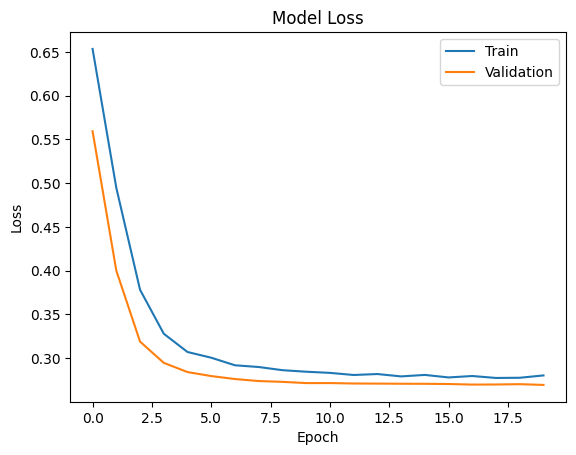

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Threshold predictions (e.g., treat outputs > 0.5 as 1, otherwise 0)
predicted_labels = (predictions > 0.5).astype(int)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
